##Creating environment for Spark Hadoop

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,559 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:14 http://s

In [ ]:
!tar xf spark-3.3.1-bin-hadoop3.tgz

In [ ]:
!pip install -q findspark
!pip install pyspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

import findspark
findspark.init()
findspark.find()

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark = SparkSession \
       .builder \
       .appName("Our First Spark example") \
       .getOrCreate()

spark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 45 kB/s 
     |████████████████████████████████| 199 kB 65.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=1bd18f49504f23cd3c7f0e3c578b8d6fe52430ef47d2ddb6e099ab221c6aee2d
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


##Uploading content from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Importing Libraries

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import *

In [ ]:
from pyspark.sql import Row
from pyspark.sql.functions import desc
from termcolor import colored

##Analysing Data

In [ ]:
import time
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, \
                                      NaiveBayes, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import regexp_replace

spark = SparkSession.builder.appName("Network Attacks Classifier").master("local").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")


features = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]



In [ ]:
dataset = spark.read.options(inferSchema='True',delimiter=',') \
  .csv("/content/drive/MyDrive/Dissertation/Data.txt")

##Data Description

In [ ]:
a=dataset.count()
b=len(dataset.columns)
print("Number of Rows: ",a)
print("Number of Columns: ",b)

Number of Rows:  125973
Number of Columns:  43


In [ ]:
dataset.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: integer (nullable = true)
 |-- _c7: integer (nullable = true)
 |-- _c8: integer (nullable = true)
 |-- _c9: integer (nullable = true)
 |-- _c10: integer (nullable = true)
 |-- _c11: integer (nullable = true)
 |-- _c12: integer (nullable = true)
 |-- _c13: integer (nullable = true)
 |-- _c14: integer (nullable = true)
 |-- _c15: integer (nullable = true)
 |-- _c16: integer (nullable = true)
 |-- _c17: integer (nullable = true)
 |-- _c18: integer (nullable = true)
 |-- _c19: integer (nullable = true)
 |-- _c20: integer (nullable = true)
 |-- _c21: integer (nullable = true)
 |-- _c22: integer (nullable = true)
 |-- _c23: integer (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: double (nullable = true)
 |-- _c26: double (nullable = true)
 |-- _c27: d

In [ ]:
dataset = dataset.toDF(*features)

In [ ]:
dataset.show()

+--------+-------------+----------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-----------+---------+
|duration|protocol_type|   service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_di

In [ ]:
dataset.select("attack").groupBy("attack").count().orderBy("count", ascending=False).show()

+---------------+-----+
|         attack|count|
+---------------+-----+
|         normal|67343|
|        neptune|41214|
|          satan| 3633|
|        ipsweep| 3599|
|      portsweep| 2931|
|          smurf| 2646|
|           nmap| 1493|
|           back|  956|
|       teardrop|  892|
|    warezclient|  890|
|            pod|  201|
|   guess_passwd|   53|
|buffer_overflow|   30|
|    warezmaster|   20|
|           land|   18|
|           imap|   11|
|        rootkit|   10|
|     loadmodule|    9|
|      ftp_write|    8|
|       multihop|    7|
+---------------+-----+
only showing top 20 rows



In [ ]:
dataset.select("protocol_type").groupBy("protocol_type").count().orderBy("count", ascending=False).show()

+-------------+------+
|protocol_type| count|
+-------------+------+
|          tcp|102689|
|          udp| 14993|
|         icmp|  8291|
+-------------+------+



In [ ]:
dataset.select("service").groupBy("service").count().orderBy("count", ascending=False).show()

+---------+-----+
|  service|count|
+---------+-----+
|     http|40338|
|  private|21853|
| domain_u| 9043|
|     smtp| 7313|
| ftp_data| 6860|
|    eco_i| 4586|
|    other| 4359|
|    ecr_i| 3077|
|   telnet| 2353|
|   finger| 1767|
|      ftp| 1754|
|     auth|  955|
|   Z39_50|  862|
|     uucp|  780|
|  courier|  734|
|      bgp|  710|
|    whois|  693|
|uucp_path|  689|
| iso_tsap|  687|
|     time|  654|
+---------+-----+
only showing top 20 rows



In [ ]:
dataset.select("flag").groupBy("flag").count().orderBy("count", ascending=False).show()

+------+-----+
|  flag|count|
+------+-----+
|    SF|74945|
|    S0|34851|
|   REJ|11233|
|  RSTR| 2421|
|  RSTO| 1562|
|    S1|  365|
|    SH|  271|
|    S2|  127|
|RSTOS0|  103|
|    S3|   49|
|   OTH|   46|
+------+-----+



In [ ]:
df0=dataset.groupBy("attack").count().orderBy("count", ascending=False)

##Graph of Attacks Count

In [ ]:
import matplotlib.pyplot as plt

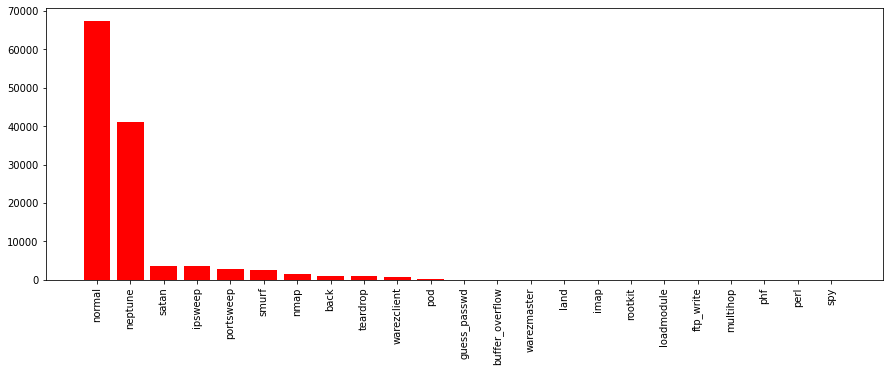

In [ ]:
x=df0.toPandas()["attack"].values.tolist()
y=df0.toPandas()["count"].values.tolist()
plt.figure(figsize=(15,5))
plt.bar(x,y,color = "red")
plt.xticks(rotation=90)
plt.show()

##Models Implementation

In [ ]:
categorical_features = ["protocol_type", "service", "flag"]
indexers = [StringIndexer(inputCol=column, outputCol=column + "_num") for column in categorical_features]
indexers.append(StringIndexer(inputCol="attack", outputCol="label_num"))
pipeline = Pipeline(stages=indexers)
dataset = pipeline.fit(dataset).transform(dataset)

In [ ]:
exclude_list = categorical_features + ["attack", "label_num"]
numerical_cols = [col for col in dataset.columns if col not in exclude_list]
print(numerical_cols)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag', 'protocol_type_num', 'service_num', 'flag_num']


In [ ]:

df_assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features")
dataset = df_assembler.transform(dataset)
dataset.printSchema()

root
 |-- duration: integer (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- hot: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_compromised: integer (nullable = true)
 |-- root_shell: integer (nullable = true)
 |-- su_attempted: integer (nullable = true)
 |-- num_root: integer (nullable = true)
 |-- num_file_creations: integer (nullable = true)
 |-- num_shells: integer (nullable = true)
 |-- num_access_files: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: integer (nullable = true

In [ ]:
dataset = dataset.select(["features","label_num"])
dataset.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label_num: double (nullable = false)



In [ ]:
train_set, test_set = dataset.randomSplit([0.80, 0.20], seed=2019)
print("Training set Count: " + str(train_set.count()))
print("Test set Count: " + str(test_set.count()))

Training set Count: 100924
Test set Count: 25049


###Multinomial Naive Bayes

In [ ]:
start = time.time()
nb = NaiveBayes(labelCol="label_num", featuresCol="features", smoothing=1.0, modelType="multinomial")

classifiers = {"Naive Bayes Multinomial": nb}

metrics = ["accuracy", "weightedPrecision", "weightedRecall", "f1"]

print("\nModels Evaluation:")
print("{:-<30}".format(""))
for c in classifiers:
	print(c)
	model = classifiers[c].fit(train_set)

	predictions = model.transform(test_set)
	predictions.cache()

	evaluator = MulticlassClassificationEvaluator(labelCol="label_num", predictionCol="prediction")

	for m in metrics:
		evaluator.setMetricName(m)
		metric = evaluator.evaluate(predictions)
		print("{name} = {value:.2f}".format(name=m, value=metric))

	print("{:-<30}".format(""))

stop = time.time()
print("\nRunning time for Spark job '{name}': {time:.2f} s"
      .format(name=spark.conf.get("spark.app.name"), time=(stop-start)))


Models Evaluation:
------------------------------
Naive Bayes Multinomial
accuracy = 0.41
weightedPrecision = 0.88
weightedRecall = 0.41
f1 = 0.43
------------------------------

Running time for Spark job 'Network Attacks Classifier': 5.58 s


###Random Forest

In [ ]:
start = time.time()
rf = RandomForestClassifier(labelCol="label_num", featuresCol="features", numTrees=20, maxBins=70)

classifiers = {"Random Forest": rf}

metrics = ["accuracy", "weightedPrecision", "weightedRecall", "f1"]

print("\nModels Evaluation:")
print("{:-<30}".format(""))
for c in classifiers:
	print(c)

	model = classifiers[c].fit(train_set)


	predictions = model.transform(test_set)
	predictions.cache()

	evaluator = MulticlassClassificationEvaluator(labelCol="label_num", predictionCol="prediction")

	for m in metrics:
		evaluator.setMetricName(m)
		metric = evaluator.evaluate(predictions)
		print("{name} = {value:.2f}".format(name=m, value=metric))

	print("{:-<30}".format(""))

stop = time.time()
print("\nRunning time for Spark job '{name}': {time:.2f} s"
      .format(name=spark.conf.get("spark.app.name"), time=(stop-start)))


Models Evaluation:
------------------------------
Random Forest
accuracy = 0.97
weightedPrecision = 0.96
weightedRecall = 0.97
f1 = 0.96
------------------------------

Running time for Spark job 'Network Attacks Classifier': 14.41 s


###Decision Tree

In [ ]:
start = time.time()

dt = DecisionTreeClassifier(labelCol="label_num", featuresCol="features",  maxBins=70)

classifiers = {"Decision Tree": dt,
               }

metrics = ["accuracy", "weightedPrecision", "weightedRecall", "f1"]

print("\nModels Evaluation:")
print("{:-<30}".format(""))
for c in classifiers:
	print(c)

	model = classifiers[c].fit(train_set)


	predictions = model.transform(test_set)
	predictions.cache()


	evaluator = MulticlassClassificationEvaluator(labelCol="label_num", predictionCol="prediction")

	for m in metrics:
		evaluator.setMetricName(m)
		metric = evaluator.evaluate(predictions)
		print("{name} = {value:.2f}".format(name=m, value=metric))

	print("{:-<30}".format(""))

stop = time.time()
print("\nRunning time for Spark job '{name}': {time:.2f} s"
      .format(name=spark.conf.get("spark.app.name"), time=(stop-start)))


Models Evaluation:
------------------------------
Decision Tree
accuracy = 0.98
weightedPrecision = 0.98
weightedRecall = 0.98
f1 = 0.98
------------------------------

Running time for Spark job 'Network Attacks Classifier': 10.12 s


###Logistic Regression

In [ ]:
start = time.time()
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0.8, featuresCol="features",
                        labelCol="label_num", family="multinomial")


classifiers = {"Logistic Regression": lr}

metrics = ["accuracy", "weightedPrecision", "weightedRecall", "f1"]

print("\nModels Evaluation:")
print("{:-<30}".format(""))
for c in classifiers:
	print(c)

	model = classifiers[c].fit(train_set)


	predictions = model.transform(test_set)
	predictions.cache()


	evaluator = MulticlassClassificationEvaluator(labelCol="label_num", predictionCol="prediction")

	for m in metrics:
		evaluator.setMetricName(m)
		metric = evaluator.evaluate(predictions)
		print("{name} = {value:.2f}".format(name=m, value=metric))

	print("{:-<30}".format(""))

stop = time.time()
print("\nRunning time for Spark job '{name}': {time:.2f} s"
      .format(name=spark.conf.get("spark.app.name"), time=(stop-start)))


Models Evaluation:
------------------------------
Logistic Regression
accuracy = 0.80
weightedPrecision = 0.72
weightedRecall = 0.80
f1 = 0.75
------------------------------

Running time for Spark job 'Network Attacks Classifier': 14.09 s


Reference:

https://www.pauldesalvo.com/how-to-install-spark-on-google-colab/

